In [330]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [267]:
#read csv file
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [268]:
df.shape

(158, 12)

In [269]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [271]:
#drop the unwanted column
df = df.drop(columns=['Region'])
df = df.drop(columns=['Country'])
df = df.drop(columns=['Happiness Rank'])
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [273]:
#check the zero or null values in particular column
df['Standard Error'].unique()

array([0.03411, 0.04884, 0.03328, 0.0388 , 0.03553, 0.0314 , 0.02799,
       0.03157, 0.03371, 0.04083, 0.0347 , 0.04454, 0.03751, 0.04176,
       0.03839, 0.04076, 0.03499, 0.03676, 0.03595, 0.03729, 0.01866,
       0.05335, 0.06476, 0.0378 , 0.0491 , 0.01848, 0.058  , 0.06257,
       0.03512, 0.04612, 0.04168, 0.04539, 0.05051, 0.03557, 0.04633,
       0.03468, 0.04206, 0.03868, 0.04456, 0.09811, 0.10895, 0.05618,
       0.05224, 0.04361, 0.04267, 0.03581, 0.04098, 0.04528, 0.05412,
       0.03914, 0.05642, 0.03799, 0.04563, 0.04114, 0.04251, 0.03843,
       0.05371, 0.04615, 0.03938, 0.04263, 0.0433 , 0.04394, 0.07832,
       0.03135, 0.13693, 0.05635, 0.0558 , 0.05099, 0.05018, 0.04175,
       0.07197, 0.04013, 0.02596, 0.03107, 0.03864, 0.03823, 0.04192,
       0.03225, 0.03363, 0.03726, 0.04524, 0.05235, 0.02424, 0.06988,
       0.06607, 0.04864, 0.04802, 0.0464 , 0.04934, 0.06161, 0.0342 ,
       0.05376, 0.07896, 0.05013, 0.06913, 0.09438, 0.07446, 0.06698,
       0.03313, 0.08

In [274]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [275]:
df['Economy (GDP per Capita)'].unique()

array([1.39651, 1.30232, 1.32548, 1.459  , 1.32629, 1.29025, 1.32944,
       1.33171, 1.25018, 1.33358, 1.22857, 0.95578, 1.33723, 1.02054,
       1.39451, 0.98124, 1.56391, 1.33596, 1.30782, 1.42727, 1.26637,
       1.36011, 1.04424, 1.52186, 1.06353, 1.32792, 1.10715, 1.69042,
       1.27778, 1.05351, 1.17898, 1.06166, 0.91861, 0.9669 , 1.39541,
       1.23011, 1.2074 , 1.29098, 1.55422, 0.99534, 1.21183, 0.76454,
       0.74553, 0.63244, 1.16891, 1.27074, 1.24461, 0.86402, 1.32376,
       1.25114, 0.68133, 0.59448, 0.75985, 1.12254, 1.18498, 1.14723,
       0.59325, 0.90019, 1.03192, 1.12555, 1.12486, 1.08254, 1.13145,
       1.13764, 0.81038, 1.20806, 1.20813, 0.93929, 0.80148, 0.95847,
       1.00761, 1.38604, 1.15174, 0.82827, 0.63216, 1.06098, 0.47428,
       0.65435, 0.77042, 1.02389, 0.59543, 0.90198, 0.97438, 0.89012,
       0.47038, 1.04345, 0.92053, 1.15991, 1.11312, 0.70532, 0.18847,
       0.73479, 0.91851, 0.08308, 0.87867, 0.83223, 0.37545, 0.89537,
       0.59066, 0.82

In [276]:
df['Family'].unique()

array([1.34951, 1.40223, 1.36058, 1.33095, 1.32261, 1.31826, 1.28017,
       1.28907, 1.31967, 1.30923, 1.22393, 1.23788, 1.29704, 0.91451,
       1.24711, 1.23287, 1.21963, 1.36948, 1.28566, 1.12575, 1.28548,
       1.08182, 1.25596, 1.02   , 1.1985 , 1.29937, 1.12447, 1.0786 ,
       1.26038, 1.24823, 1.20643, 1.2089 , 1.24018, 1.26504, 1.08393,
       1.31379, 1.30203, 1.07617, 1.16594, 0.972  , 1.18354, 1.02507,
       1.04356, 1.34043, 1.26999, 1.25712, 0.95774, 0.99903, 1.21624,
       1.19777, 0.97841, 1.01528, 1.30477, 1.12241, 1.27385, 1.25745,
       1.14184, 0.97459, 1.23289, 1.27948, 1.07023, 0.79624, 1.11862,
       1.23617, 1.15102, 1.07008, 0.89318, 1.07772, 0.81198, 1.22668,
       0.98521, 1.05818, 1.22791, 1.08708, 0.91226, 0.94632, 1.15115,
       0.90432, 1.10395, 0.93793, 0.41411, 1.05392, 0.90557, 0.94675,
       0.91612, 0.88588, 1.00964, 1.13935, 1.09562, 1.03516, 0.95152,
       0.64095, 1.00232, 1.02626, 0.80434, 0.91916, 1.04103, 1.17202,
       0.73803, 1.30

In [277]:
df['Health (Life Expectancy)'].unique()

array([0.94143, 0.94784, 0.87464, 0.88521, 0.90563, 0.88911, 0.89284,
       0.91087, 0.90837, 0.93156, 0.91387, 0.86027, 0.89042, 0.81444,
       0.86179, 0.69702, 0.91894, 0.89533, 0.89667, 0.80925, 0.90943,
       0.76276, 0.72052, 1.02525, 0.79661, 0.89186, 0.85857, 0.79733,
       0.94579, 0.78723, 0.84483, 0.8116 , 0.69077, 0.7385 , 0.72025,
       0.95562, 0.88721, 0.8753 , 0.72492, 0.6082 , 0.61483, 0.67737,
       0.64425, 0.59772, 0.78902, 0.99111, 0.96538, 0.79075, 0.74716,
       0.95446, 0.5392 , 0.61826, 0.66098, 0.64368, 0.87337, 0.73128,
       0.74314, 0.73017, 0.73608, 0.77903, 0.72394, 0.78805, 0.7038 ,
       0.66926, 0.68741, 0.92356, 0.61766, 0.63132, 0.53886, 0.7095 ,
       1.01328, 0.77361, 0.63793, 0.74676, 0.73172, 0.65088, 0.16007,
       0.57407, 0.64045, 0.51466, 0.69639, 0.72521, 0.81658, 0.29924,
       0.7689 , 0.74836, 0.87519, 0.72437, 0.58114, 0.43873, 0.60954,
       0.73545, 0.09131, 0.81325, 0.79081, 0.07612, 0.66825, 0.54909,
       0.60268, 0.07

In [278]:
df['Freedom'].unique()

array([0.66557, 0.62877, 0.64938, 0.66973, 0.63297, 0.64169, 0.61576,
       0.6598 , 0.63938, 0.65124, 0.41319, 0.63376, 0.62433, 0.48181,
       0.54604, 0.49049, 0.61583, 0.61777, 0.5845 , 0.64157, 0.59625,
       0.63274, 0.42908, 0.54252, 0.5421 , 0.61477, 0.44132, 0.6404 ,
       0.55011, 0.44974, 0.46364, 0.60362, 0.53466, 0.55664, 0.31048,
       0.45951, 0.60365, 0.3974 , 0.55499, 0.59657, 0.55884, 0.4035 ,
       0.57733, 0.65821, 0.31751, 0.49615, 0.33208, 0.48574, 0.45492,
       0.26236, 0.57414, 0.32818, 0.53899, 0.51649, 0.60855, 0.21342,
       0.55475, 0.41496, 0.37938, 0.53122, 0.53024, 0.25883, 0.41668,
       0.36679, 0.50442, 0.49027, 0.40672, 0.28579, 0.24749, 0.4761 ,
       0.56066, 0.59608, 0.44888, 0.46611, 0.59444, 0.22815, 0.43477,
       0.34334, 0.53206, 0.3703 , 0.12102, 0.40661, 0.1826 , 0.51697,
       0.48827, 0.35068, 0.20107, 0.51469, 0.29671, 0.62545, 0.46582,
       0.41691, 0.33457, 0.34037, 0.35733, 0.09245, 0.31767, 0.57672,
       0.59591, 0.43

In [279]:
df['Trust (Government Corruption)'].unique()

array([0.41978, 0.14145, 0.48357, 0.36503, 0.32957, 0.41372, 0.31814,
       0.43844, 0.42922, 0.35637, 0.07785, 0.10583, 0.18676, 0.21312,
       0.1589 , 0.17521, 0.37798, 0.28703, 0.2254 , 0.38583, 0.32067,
       0.32524, 0.11069, 0.4921 , 0.0927 , 0.21843, 0.12869, 0.52208,
       0.20646, 0.08484, 0.02652, 0.24558, 0.0512 , 0.03187, 0.06398,
       0.13586, 0.08129, 0.25609, 0.13633, 0.0114 , 0.11776, 0.09472,
       0.30826, 0.03431, 0.1806 , 0.07857, 0.1809 , 0.306  , 0.02901,
       0.088  , 0.01615, 0.08242, 0.08454, 0.03787, 0.01031, 0.19317,
       0.05989, 0.1909 , 0.04212, 0.10501, 0.0243 , 0.11023, 0.03005,
       0.02299, 0.1428 , 0.06146, 0.17383, 0.04741, 0.30844, 0.07521,
       0.37124, 0.15184, 0.     , 0.10441, 0.15746, 0.04232, 0.0403 ,
       0.15445, 0.16065, 0.10464, 0.14293, 0.14296, 0.02781, 0.12468,
       0.00649, 0.02617, 0.01078, 0.06332, 0.12279, 0.39928, 0.08546,
       0.05327, 0.15603, 0.06413, 0.00227, 0.12504, 0.14234, 0.24249,
       0.02666, 0.03

In [280]:
df['Generosity'].unique()

array([0.29678, 0.4363 , 0.34139, 0.34699, 0.45811, 0.23351, 0.4761 ,
       0.36262, 0.47501, 0.43562, 0.33172, 0.25497, 0.33088, 0.14074,
       0.40105, 0.14574, 0.28034, 0.45901, 0.2225 , 0.26428, 0.51912,
       0.21542, 0.05841, 0.31105, 0.24434, 0.28214, 0.33363, 0.32573,
       0.12332, 0.11451, 0.10686, 0.2324 , 0.18401, 0.5763 , 0.13706,
       0.18227, 0.51752, 0.25376, 0.16228, 0.16991, 0.31844, 0.10692,
       0.27489, 0.22837, 0.16893, 0.10705, 0.18557, 0.11541, 0.17362,
       0.22823, 0.20536, 0.20951, 0.3424 , 0.11827, 0.25328, 0.02641,
       0.27815, 0.14982, 0.11046, 0.16759, 0.33075, 0.05444, 0.18295,
       0.00199, 0.2123 , 0.26169, 0.30638, 0.07822, 0.2831 , 0.16979,
       0.37744, 0.39478, 0.0868 , 0.51535, 0.1686 , 0.12253, 0.3003 ,
       0.27233, 0.47998, 0.07799, 0.33671, 0.11053, 0.1614 , 0.08185,
       0.19591, 0.13748, 0.19231, 0.13719, 0.18226, 0.24991, 0.50318,
       0.07172, 0.22359, 0.22269, 0.14272, 0.24808, 0.16388, 0.21684,
       0.42192, 0.33

In [281]:
df['Dystopia Residual'].unique()

array([2.51738, 2.70201, 2.49204, 2.46531, 2.45176, 2.61955, 2.4657 ,
       2.37119, 2.26425, 2.26646, 3.08854, 3.17728, 2.5332 , 3.60214,
       2.51011, 3.26001, 1.96961, 1.9757 , 2.41484, 2.24743, 1.96994,
       2.47489, 3.19131, 1.88501, 2.84848, 2.11569, 2.67585, 1.55674,
       2.21126, 2.836  , 2.67782, 2.32142, 2.85737, 2.31945, 2.43872,
       2.12367, 1.6488 , 2.32323, 1.87634, 2.79094, 2.26882, 3.035  ,
       2.74255, 2.23741, 2.24639, 1.68435, 2.21978, 2.53942, 1.73797,
       2.02518, 2.82334, 3.10712, 2.18896, 2.24729, 1.61583, 2.44649,
       2.32407, 2.5945 , 2.1309 , 1.86565, 1.88541, 2.75414, 2.09066,
       2.27394, 2.32038, 1.59888, 1.88931, 2.43209, 2.76579, 1.86984,
       1.76145, 0.65429, 1.58782, 1.86399, 2.20173, 2.08528, 2.2327 ,
       2.89319, 1.63794, 2.00073, 3.10709, 1.87996, 2.10017, 1.8604 ,
       2.6343 , 1.93129, 2.025  , 1.26462, 1.62215, 1.7536 , 2.11032,
       2.45373, 1.73933, 3.05137, 1.89894, 2.06367, 2.79832, 1.21305,
       1.73799, 1.34

In [282]:
df.tail(5)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [283]:
#fill the zero value by mean value of that particular column
df['Economy (GDP per Capita)'] = df['Economy (GDP per Capita)'].replace(0,df['Economy (GDP per Capita)'].mean()) 
df['Economy (GDP per Capita)'].unique()

array([1.39651   , 1.30232   , 1.32548   , 1.459     , 1.32629   ,
       1.29025   , 1.32944   , 1.33171   , 1.25018   , 1.33358   ,
       1.22857   , 0.95578   , 1.33723   , 1.02054   , 1.39451   ,
       0.98124   , 1.56391   , 1.33596   , 1.30782   , 1.42727   ,
       1.26637   , 1.36011   , 1.04424   , 1.52186   , 1.06353   ,
       1.32792   , 1.10715   , 1.69042   , 1.27778   , 1.05351   ,
       1.17898   , 1.06166   , 0.91861   , 0.9669    , 1.39541   ,
       1.23011   , 1.2074    , 1.29098   , 1.55422   , 0.99534   ,
       1.21183   , 0.76454   , 0.74553   , 0.63244   , 1.16891   ,
       1.27074   , 1.24461   , 0.86402   , 1.32376   , 1.25114   ,
       0.68133   , 0.59448   , 0.75985   , 1.12254   , 1.18498   ,
       1.14723   , 0.59325   , 0.90019   , 1.03192   , 1.12555   ,
       1.12486   , 1.08254   , 1.13145   , 1.13764   , 0.81038   ,
       1.20806   , 1.20813   , 0.93929   , 0.80148   , 0.95847   ,
       1.00761   , 1.38604   , 1.15174   , 0.82827   , 0.63216

In [284]:
#fill the zero value by mean value of that particular column
df['Family'] = df['Family'].replace(0,df['Family'].mean()) 
df['Health (Life Expectancy)'] = df['Health (Life Expectancy)'].replace(0,df['Health (Life Expectancy)'].mean()) 
df['Freedom'] = df['Freedom'].replace(0,df['Freedom'].mean()) 
df['Trust (Government Corruption)'] = df['Trust (Government Corruption)'].replace(0,df['Trust (Government Corruption)'].mean()) 
df['Generosity'] = df['Generosity'].replace(0,df['Generosity'].mean())


C:\Users\Celsius\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Celsius\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Celsius\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

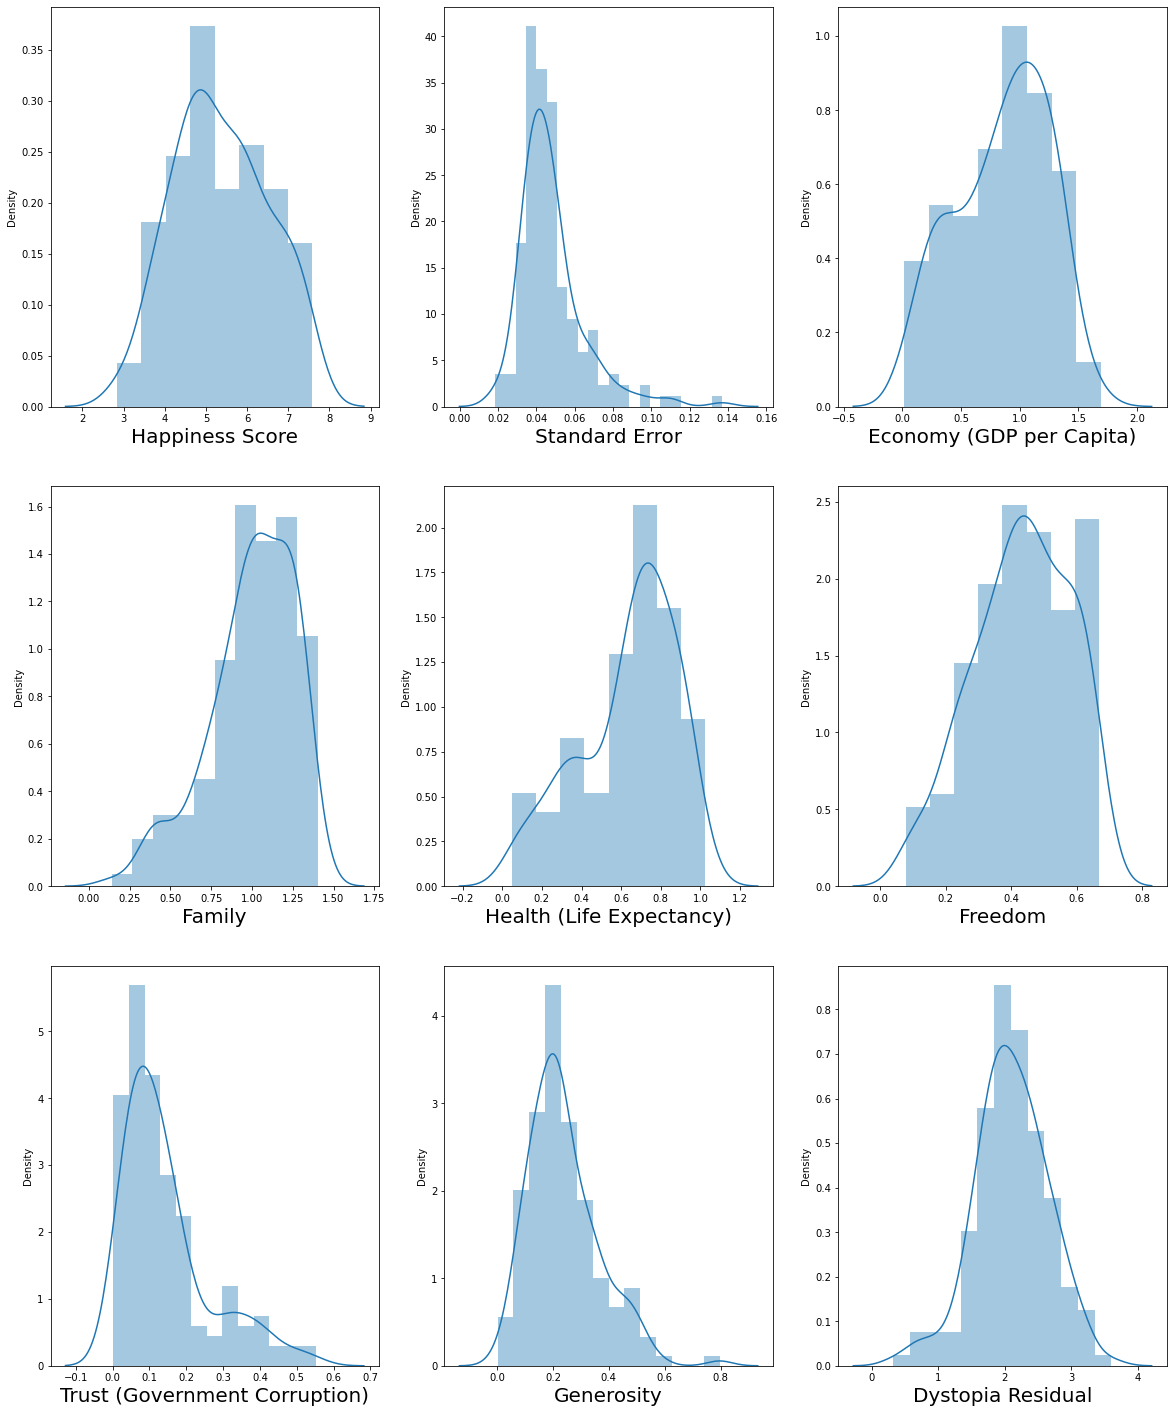

In [285]:
#visualisation by using distplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

C:\Users\Celsius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Celsius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Celsius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Celsius\anaconda

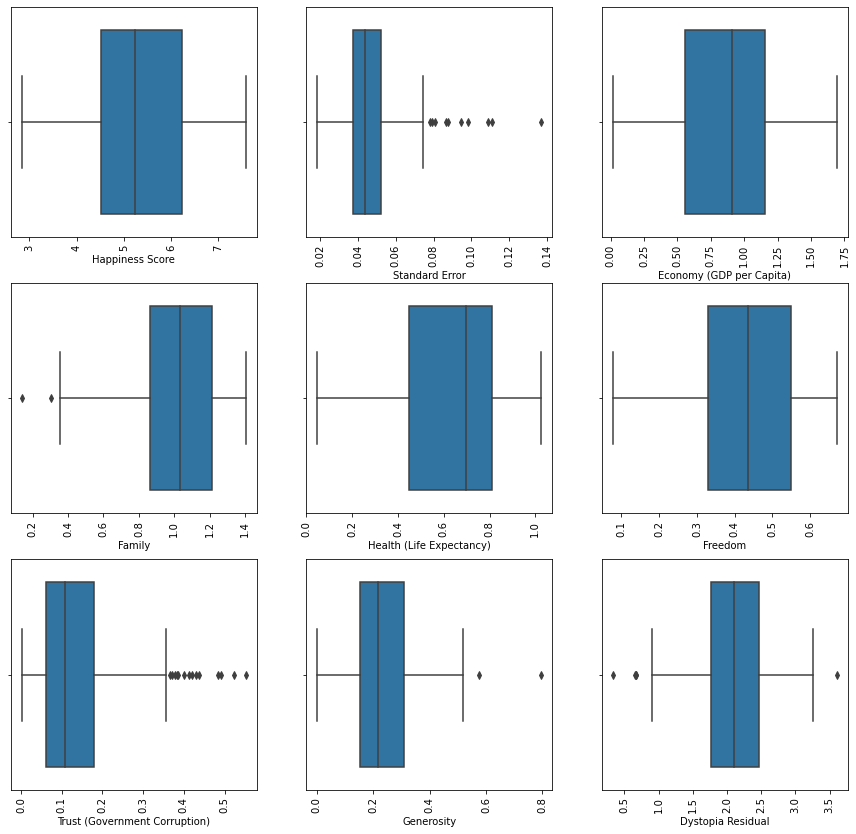

In [286]:
#visualisation by using boxplot
plt.figure(figsize=(15,50), facecolor='white')
graph = 1
for column in df:
    if graph<30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        plt.xticks(rotation ='vertical')
    graph+=1
plt.show()

In [204]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Standard Error'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Standard Error'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [287]:
# higher side Standard error
higher_side = df['Standard Error'] >= (q3+1.5*iqr)
 
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side Standard error
lower_side = df['Standard Error'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Name: Standard Error, Length: 158, dtype: bool
(array([ 39,  40,  62,  64,  70,  93,  96,  97, 100, 115, 118, 125, 156],
      dtype=int64),)
Lower: 0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Name: Standard Error, Length: 158, dtype: bool
(array([], dtype=int64),)
old Shape:  (158, 9)


In [288]:
#removing the outliers
df = df.drop(df.index[high])
 
print("New Shape: ", df.shape)

New Shape:  (145, 9)


In [291]:
#Detecting the outlier by using iqr method and removing them.
q1_gene = np.percentile(df['Generosity'], 25,
                   interpolation = 'midpoint')
 
q3_gene = np.percentile(df['Generosity'], 75,
                   interpolation = 'midpoint')
iqr_gene = q3_gene - q1_gene

In [292]:
# higher side Generosity
higher_side_gene = df['Generosity'] >= (q3_gene+1.5*iqr_gene)
 
print("Higher:", higher_side_gene)
print(np.where(higher_side_gene))
high_gene = np.where(higher_side_gene)
 
# lower side Generosity
lower_side_gene = df['Generosity'] <= (q1_gene-1.5*iqr_gene)
print("Lower:", lower_side_gene)
print(np.where(lower_side_gene))
print("old Shape: ", df.shape)

Higher: 0      False
1      False
2      False
3      False
4      False
       ...  
152    False
153    False
154    False
155    False
157    False
Name: Generosity, Length: 145, dtype: bool
(array([ 33, 116], dtype=int64),)
Lower: 0      False
1      False
2      False
3      False
4      False
       ...  
152    False
153    False
154    False
155    False
157    False
Name: Generosity, Length: 145, dtype: bool
(array([], dtype=int64),)
old Shape:  (145, 9)


In [293]:
#removing the outliers
df = df.drop(df.index[high_gene])
 
print("New Shape: ", df.shape)

New Shape:  (143, 9)


In [294]:
#Detecting the outlier by using iqr method and removing them.
q1_f = np.percentile(df['Family'], 25,
                   interpolation = 'midpoint')
 
q3_f = np.percentile(df['Family'], 75,
                   interpolation = 'midpoint')
iqr_f = q3_f - q1_f

In [295]:
# higher side Family
higher_side_f = df['Family'] >= (q3_f+1.5*iqr_f)
 
print("Higher:", higher_side_f)
print(np.where(higher_side_f))
high_f = np.where(higher_side_f)
 
# lower side Family
lower_side_f = df['Family'] <= (q1_f-1.5*iqr_f)
print("Lower:", lower_side_f)
print(np.where(lower_side_f))
low_f = np.where(lower_side_f)
print("old Shape: ", df.shape)

Higher: 0      False
1      False
2      False
3      False
4      False
       ...  
152    False
153    False
154    False
155    False
157    False
Name: Family, Length: 143, dtype: bool
(array([], dtype=int64),)
Lower: 0      False
1      False
2      False
3      False
4      False
       ...  
152     True
153    False
154    False
155    False
157     True
Name: Family, Length: 143, dtype: bool
(array([138, 142], dtype=int64),)
old Shape:  (143, 9)


In [296]:
#removing the outliers
df = df.drop(df.index[low_f])
 
print("New Shape: ", df.shape)

New Shape:  (141, 9)


In [297]:
#Detecting the outlier by using iqr method and removing them.
q1_h = np.percentile(df['Health (Life Expectancy)'], 25,
                   interpolation = 'midpoint')
 
q3_h = np.percentile(df['Health (Life Expectancy)'], 75,
                   interpolation = 'midpoint')
iqr_h = q3_h - q1_h

In [298]:
# higher side Health (Life Expectancy)
higher_side_h = df['Health (Life Expectancy)'] >= (q3_h+1.5*iqr_h)
 
print("Higher:", higher_side_h)
print(np.where(higher_side_h))
high_h = np.where(higher_side_h)
 
# lower side Health (Life Expectancy)
lower_side_h = df['Health (Life Expectancy)'] <= (q1_h-1.5*iqr_h)
print("Lower:", lower_side_h)
print(np.where(lower_side_h))
low_h = np.where(lower_side_h)
print("old Shape: ", df.shape)

Higher: 0      False
1      False
2      False
3      False
4      False
       ...  
150    False
151    False
153    False
154    False
155    False
Name: Health (Life Expectancy), Length: 141, dtype: bool
(array([], dtype=int64),)
Lower: 0      False
1      False
2      False
3      False
4      False
       ...  
150    False
151    False
153    False
154    False
155    False
Name: Health (Life Expectancy), Length: 141, dtype: bool
(array([114, 133], dtype=int64),)
old Shape:  (141, 9)


In [299]:
#removing the outliers
df = df.drop(df.index[low_h])
print("New Shape: ", df.shape)

New Shape:  (139, 9)


In [300]:
#Detecting the outlier by using iqr method and removing them.
q1_d = np.percentile(df['Dystopia Residual'], 25,
                   interpolation = 'midpoint')
 
q3_d = np.percentile(df['Dystopia Residual'], 75,
                   interpolation = 'midpoint')
iqr_d = q3_d - q1_d

In [301]:
# higher side Dystopia Residual
higher_side_d = df['Dystopia Residual'] >= (q3_d+1.5*iqr_d)
 
print("Higher:", higher_side_d)
print(np.where(higher_side_d))
high_d = np.where(higher_side_d)
 
# lower side Dystopia Residual
lower_side_d = df['Dystopia Residual'] <= (q1_d-1.5*iqr_d)
print("Lower:", lower_side_d)
print(np.where(lower_side_d))
low_d = np.where(lower_side_d)
print("old Shape: ", df.shape)

Higher: 0      False
1      False
2      False
3      False
4      False
       ...  
150    False
151    False
153    False
154    False
155    False
Name: Dystopia Residual, Length: 139, dtype: bool
(array([13], dtype=int64),)
Lower: 0      False
1      False
2      False
3      False
4      False
       ...  
150    False
151    False
153     True
154    False
155     True
Name: Dystopia Residual, Length: 139, dtype: bool
(array([ 65, 116, 136, 138], dtype=int64),)
old Shape:  (139, 9)


In [302]:
#removing the outliers
df = df.drop(df.index[low_d])
print("New Shape: ", df.shape)

New Shape:  (135, 9)


C:\Users\Celsius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Celsius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Celsius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Celsius\anaconda

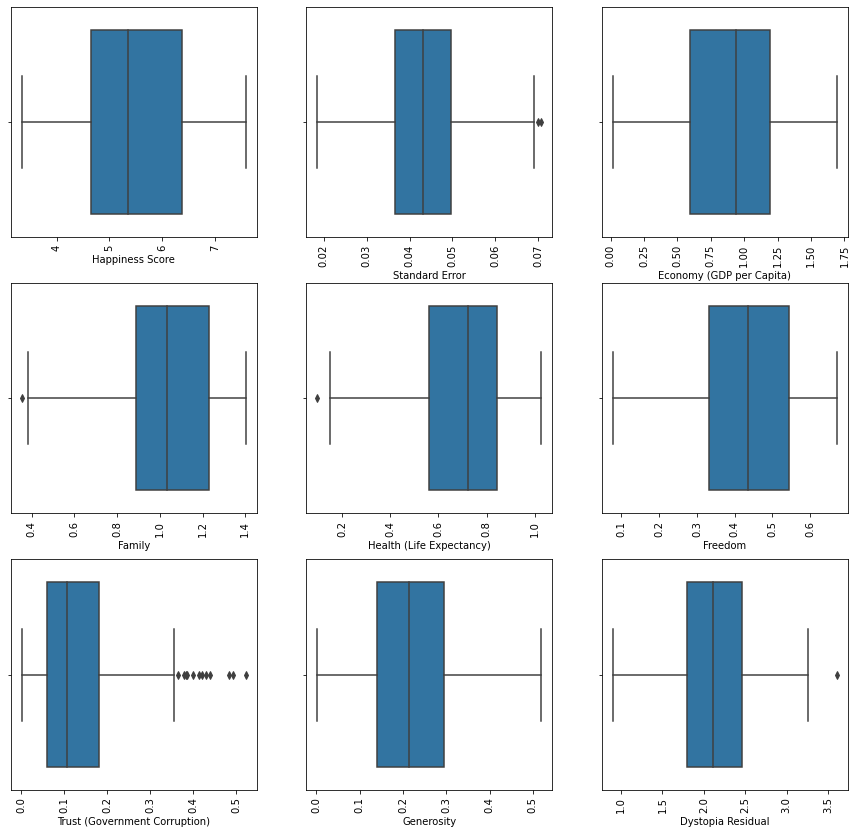

In [303]:
#visualisation by using boxplot
plt.figure(figsize=(15,50), facecolor='white')
graph = 1
for column in df:
    if graph<30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        plt.xticks(rotation ='vertical')
    graph+=1
plt.show()

In [304]:
#removing the unwanted columns
df = df.drop(columns=['Trust (Government Corruption)'])

In [308]:
#reset the index
df = df.reset_index()
df

,index,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738
1,1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201
2,2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.34139,2.49204
3,3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.34699,2.46531
4,4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
130,148,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.18386,1.94296
131,149,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.28657,1.99172
132,150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.20165,1.41723
133,151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.21747,1.46494


In [309]:
#drop the unwanted column 'index'
df = df.drop(columns=['index'])
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.45811,2.45176
...,...,...,...,...,...,...,...,...
130,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.18386,1.94296
131,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.28657,1.99172
132,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.20165,1.41723
133,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.21747,1.46494


C:\Users\Celsius\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Celsius\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Celsius\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

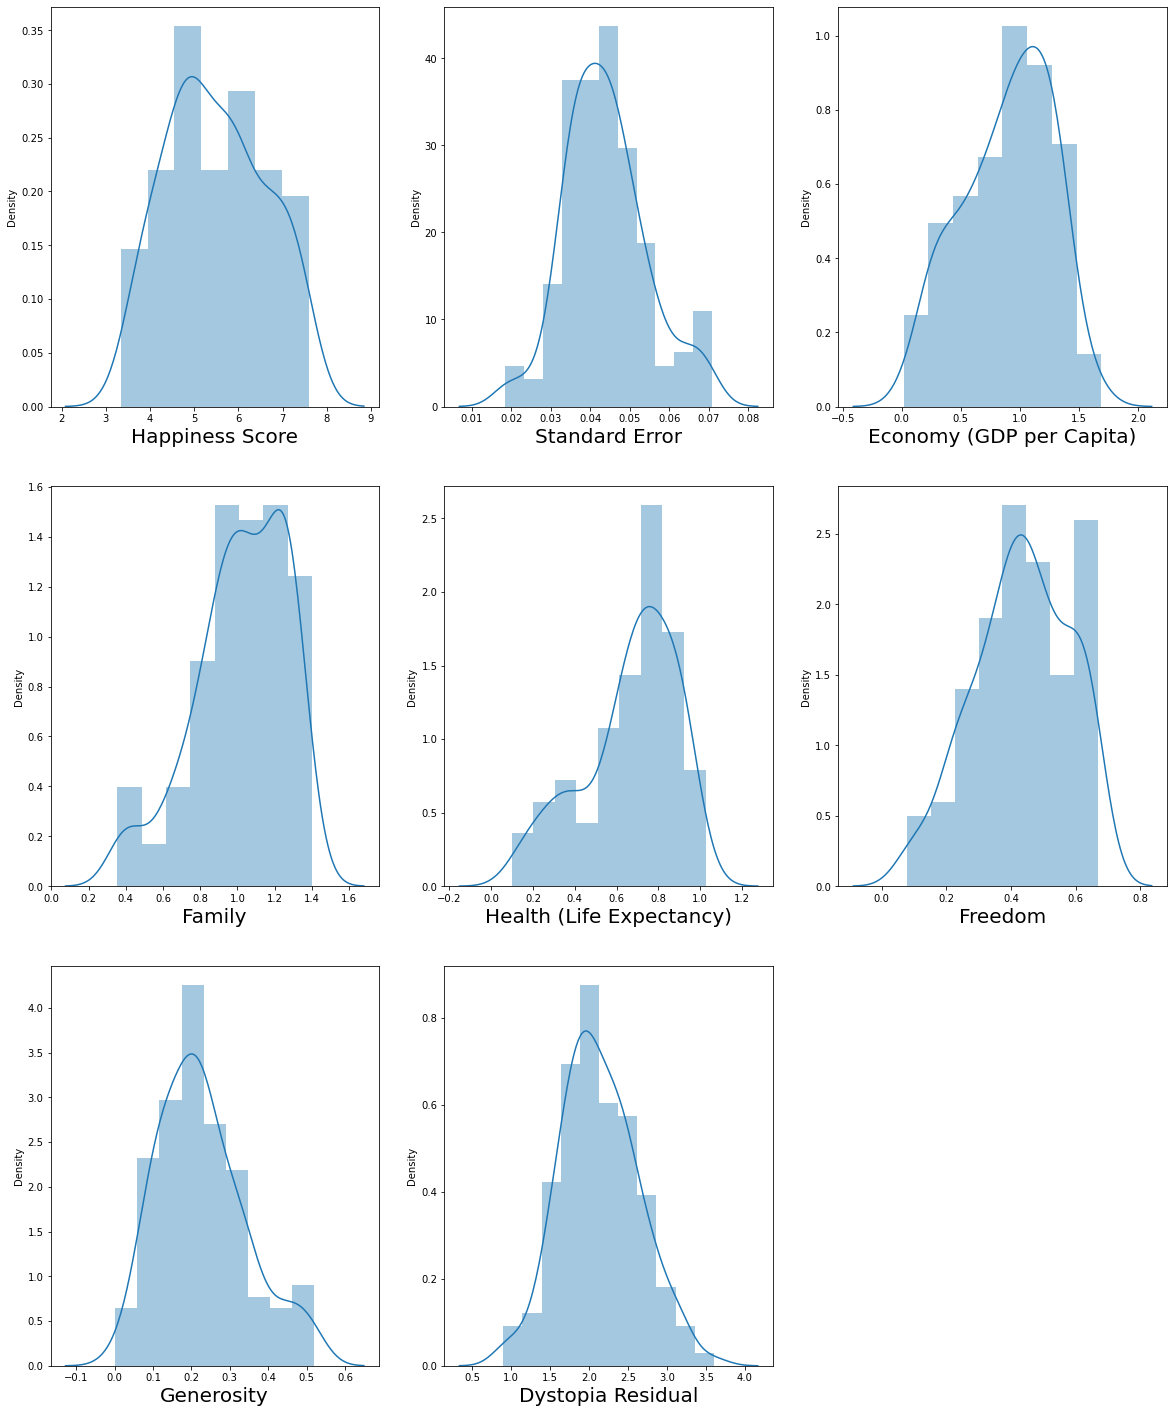

In [310]:
#visualisation by using distplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [311]:
#split the features and label into x and y
y = df['Happiness Score']
x = df.drop(columns = ['Happiness Score'])

In [312]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.45811,2.45176
...,...,...,...,...,...,...,...
130,0.03830,0.34193,0.76062,0.15010,0.23501,0.18386,1.94296
131,0.03590,0.17417,0.46475,0.24009,0.37725,0.28657,1.99172
132,0.05141,0.46534,0.77115,0.15185,0.46866,0.20165,1.41723
133,0.04324,0.25812,0.85188,0.27125,0.39493,0.21747,1.46494


In [313]:
#scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-9.45635354e-01,  1.33249793e+00,  1.34660933e+00,
         1.24730382e+00,  1.59080717e+00,  5.94503153e-01,
         7.68534540e-01],
       [ 4.79536637e-01,  1.08315964e+00,  1.56097472e+00,
         1.27629563e+00,  1.33952243e+00,  1.80975310e+00,
         1.13935091e+00],
       [-1.02594036e+00,  1.14446843e+00,  1.39162119e+00,
         9.45219200e-01,  1.48025555e+00,  9.83066082e-01,
         7.17640932e-01],
       [-4.91863688e-01,  1.49792048e+00,  1.27114231e+00,
         9.93026274e-01,  1.61921328e+00,  1.03184332e+00,
         6.63955607e-01],
       [-8.08246065e-01,  1.14661265e+00,  1.23723094e+00,
         1.08538393e+00,  1.36820167e+00,  1.99972300e+00,
         6.36741385e-01],
       [-1.20783604e+00,  1.05120813e+00,  1.21954335e+00,
         1.01066559e+00,  1.42774523e+00,  4.34075117e-02,
         9.73735800e-01],
       [-1.53776384e+00,  1.15495128e+00,  1.06466517e+00,
         1.02753602e+00,  1.25068508e+00,  2.15641986e+00,
         6.6473889

In [314]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=42)

In [315]:
y_train.head()

68     5.332
56     5.791
24     6.786
113    4.297
118    4.077
Name: Happiness Score, dtype: float64

In [316]:
#Model instantiating and training
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [317]:
#Adjusted r2score
regression.score(x_train, y_train)

0.9856491326188166

In [318]:
#Let's check how well model fits the test data
regression.score(x_test,y_test)

0.9802564818223364

In [319]:
df.head(2)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201


In [322]:
#predict the happiness rate
print('Happiness Rate is: ', regression.predict( scaler.transform([[0.0311,1.40,1.30,.95, 0.65, 0.30, 2.50]])))

Happiness Rate is:  [7.39763725]
